In [1]:
import pandas as pd
import requests
from tiingo import TiingoClient

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#Import Moon Phase CSV.

moon_phase_df = pd.read_csv('moon_phases_UTC_2017-2025.csv')
moon_phase_df

,Date,Area,Category,Phase
0,1/1/17,0.1826,1,0.0913
1,1/2/17,0.2499,1,0.1249
2,1/3/17,0.3172,1,0.1586
3,1/4/17,0.3845,2,0.1922
4,1/5/17,0.4518,2,0.2259
...,...,...,...,...
3068,5/27/25,0.0086,0,0.9957
3069,5/28/25,0.0596,0,0.0298
3070,5/29/25,0.1278,1,0.0639
3071,5/30/25,0.1961,1,0.0980


In [5]:
# Create New column with category names
category_mapping = {
    0: 'New Moon',
    1: 'Waxing Crescent Moon',
    2: 'First Quarter Moon',
    3: 'Waxing Gibbous Moon',
    4: 'Full Moon',
    5: 'Waning Gibbous Moon',
    6: 'Last Quarter Moon',
    7: 'Waning Crescent Moon'
}
moon_phase_df['moon_phase'] = moon_phase_df['Category'].map(category_mapping)
moon_phase_df

,Date,Area,Category,Phase,moon_phase
0,1/1/17,0.1826,1,0.0913,Waxing Crescent Moon
1,1/2/17,0.2499,1,0.1249,Waxing Crescent Moon
2,1/3/17,0.3172,1,0.1586,Waxing Crescent Moon
3,1/4/17,0.3845,2,0.1922,First Quarter Moon
4,1/5/17,0.4518,2,0.2259,First Quarter Moon
...,...,...,...,...,...
3068,5/27/25,0.0086,0,0.9957,New Moon
3069,5/28/25,0.0596,0,0.0298,New Moon
3070,5/29/25,0.1278,1,0.0639,Waxing Crescent Moon
3071,5/30/25,0.1961,1,0.0980,Waxing Crescent Moon


In [6]:
moon_phase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3073 non-null   object 
 1   Area        3073 non-null   float64
 2   Category    3073 non-null   int64  
 3   Phase       3073 non-null   float64
 4   moon_phase  3073 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 120.2+ KB


In [7]:
#Change date column to datetime object
moon_phase_df['Date'] = pd.to_datetime(moon_phase_df['Date'])
moon_phase_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3073 non-null   datetime64[ns]
 1   Area        3073 non-null   float64       
 2   Category    3073 non-null   int64         
 3   Phase       3073 non-null   float64       
 4   moon_phase  3073 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 120.2+ KB


/var/folders/54/_867m59s07dcpb6y_rqmphr00000gn/T/ipykernel_66642/1910122902.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  moon_phase_df['Date'] = pd.to_datetime(moon_phase_df['Date'])


In [8]:
#Sort DF by dates in ascending order
moon_phase_df = moon_phase_df.sort_values('Date').reset_index(drop=True)

#Change all columns to lowercase to match the all_assets_df
moon_phase_df = moon_phase_df.rename(columns=str.lower)
moon_phase_df

,date,area,category,phase,moon_phase
0,2017-01-01,0.1826,1,0.0913,Waxing Crescent Moon
1,2017-01-02,0.2499,1,0.1249,Waxing Crescent Moon
2,2017-01-03,0.3172,1,0.1586,Waxing Crescent Moon
3,2017-01-04,0.3845,2,0.1922,First Quarter Moon
4,2017-01-05,0.4518,2,0.2259,First Quarter Moon
...,...,...,...,...,...
3068,2025-05-27,0.0086,0,0.9957,New Moon
3069,2025-05-28,0.0596,0,0.0298,New Moon
3070,2025-05-29,0.1278,1,0.0639,Waxing Crescent Moon
3071,2025-05-30,0.1961,1,0.0980,Waxing Crescent Moon


In [9]:
moon_phase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3073 non-null   datetime64[ns]
 1   area        3073 non-null   float64       
 2   category    3073 non-null   int64         
 3   phase       3073 non-null   float64       
 4   moon_phase  3073 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 120.2+ KB


In [10]:
#Save new Moon Phase csv.
moon_phase_df.to_csv('moon_phase_df.csv')

In [11]:
#Import Skyfield.api for planet planet positions (Mars)
from skyfield.api import load

In [12]:
#Load planet ephemeris DE421 
planets = load('de421.bsp')
earth = planets['earth']
mercury = planets['mercury']




In [13]:
#Create a timescale for current time
ts = load.timescale()

#Date Range
dates = pd.date_range(start='2017-01-01', end='2025-05-31', freq='D')
t = ts.utc(dates.year.values, dates.month.values, dates.day.values) 

#Position of Mars from Earth
astrometric = earth.at(t).observe(mercury).apparent()

#Get ecliptic longitude
ecl = astrometric.ecliptic_latlon()
longitude = ecl[1].degrees

#Create Data frame
mercury_df = pd.DataFrame({'date': dates, 'longitude': longitude})

mercury_df.head()

,date,longitude
0,2017-01-01,273.040730
1,2017-01-02,271.932546
2,2017-01-03,270.968014
3,2017-01-04,270.163362
4,2017-01-05,269.527127


In [14]:
mercury_df['longitude_diff'] = mercury_df['longitude'].diff()
mercury_df['retrograde'] = mercury_df['longitude_diff'] < 0

mercury_df.head()

,date,longitude,longitude_diff,retrograde
0,2017-01-01,273.040730,NaN,False
1,2017-01-02,271.932546,-1.108184,True
2,2017-01-03,270.968014,-0.964531,True
3,2017-01-04,270.163362,-0.804653,True
4,2017-01-05,269.527127,-0.636234,True


In [15]:
mercury_df.info()
mercury_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3073 non-null   datetime64[ns]
 1   longitude       3073 non-null   float64       
 2   longitude_diff  3072 non-null   float64       
 3   retrograde      3073 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2)
memory usage: 75.2 KB


(3073, 4)

In [16]:
mercury_df['retrograde'].value_counts()

retrograde
False    2476
True      597
Name: count, dtype: int64

In [17]:
mercury_df = mercury_df.sort_values('date').reset_index(drop=True)
mercury_df

,date,longitude,longitude_diff,retrograde
0,2017-01-01,273.040730,NaN,False
1,2017-01-02,271.932546,-1.108184,True
2,2017-01-03,270.968014,-0.964531,True
3,2017-01-04,270.163362,-0.804653,True
4,2017-01-05,269.527127,-0.636234,True
...,...,...,...,...
3068,2025-05-27,61.717095,2.160769,False
3069,2025-05-28,63.893860,2.176765,False
3070,2025-05-29,66.082824,2.188963,False
3071,2025-05-30,68.279871,2.197047,False


In [18]:
mercury_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3073 non-null   datetime64[ns]
 1   longitude       3073 non-null   float64       
 2   longitude_diff  3072 non-null   float64       
 3   retrograde      3073 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2)
memory usage: 75.2 KB


In [3]:
# TIINGO(Crypto & Stock Market Data) API key
import os
api_key = os.getenv("MY_API_KEY")

In [20]:
# Replace with your actual Tiingo API key
config = {
    'session': True,
    'api_key': api_key
}

client = TiingoClient(config)


In [21]:
start_date = "2017-01-01"
end_date = "2025-06-01"


# ETFs for Indexes and Gold
qqq_df = client.get_dataframe("QQQ", startDate=start_date, endDate=end_date)
spy_df = client.get_dataframe("SPY", startDate=start_date, endDate=end_date)
gld_df = client.get_dataframe("GLD", startDate=start_date, endDate=end_date)


In [22]:
qqq_df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2017-01-03 00:00:00+00:00,119.54,119.99,118.8900,119.31,22307608,112.535400,112.959032,111.923488,112.318877,22307608,0.0,1.0
2017-01-04 00:00:00+00:00,120.19,120.41,119.6561,119.67,19749074,113.147313,113.354422,112.644697,112.657783,19749074,0.0,1.0
2017-01-05 00:00:00+00:00,120.87,120.95,120.1000,120.16,20644254,113.787467,113.862780,113.062586,113.119071,20644254,0.0,1.0
2017-01-06 00:00:00+00:00,121.93,122.25,120.6850,120.99,24074305,114.785355,115.086604,113.613308,113.900436,24074305,0.0,1.0
2017-01-09 00:00:00+00:00,122.33,122.55,121.9500,122.03,18909234,115.161917,115.369026,114.804183,114.879496,18909234,0.0,1.0


In [23]:
#Reset ETFs index
qqq_df = qqq_df.reset_index()
spy_df = spy_df.reset_index()
gld_df = gld_df.reset_index()

In [24]:
#Created a new "asset" column in each DF to later combine and identify each asset.
qqq_df['asset'] = 'QQQ'
spy_df['asset'] = 'SPY'
gld_df['asset'] = 'GLD'

#Combine individual DF into a single DF.
etf_df = pd.concat([qqq_df, spy_df, gld_df], ignore_index=True)
etf_df = etf_df.reset_index()
etf_df.info()
etf_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6342 entries, 0 to 6341
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   index        6342 non-null   int64              
 1   date         6342 non-null   datetime64[ns, UTC]
 2   close        6342 non-null   float64            
 3   high         6342 non-null   float64            
 4   low          6342 non-null   float64            
 5   open         6342 non-null   float64            
 6   volume       6342 non-null   int64              
 7   adjClose     6342 non-null   float64            
 8   adjHigh      6342 non-null   float64            
 9   adjLow       6342 non-null   float64            
 10  adjOpen      6342 non-null   float64            
 11  adjVolume    6342 non-null   int64              
 12  divCash      6342 non-null   float64            
 13  splitFactor  6342 non-null   float64            
 14  asset        6342 non-nu

,index,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,asset
0,0,2017-01-03 00:00:00+00:00,119.54,119.99,118.8900,119.31,22307608,112.535400,112.959032,111.923488,112.318877,22307608,0.0,1.0,QQQ
1,1,2017-01-04 00:00:00+00:00,120.19,120.41,119.6561,119.67,19749074,113.147313,113.354422,112.644697,112.657783,19749074,0.0,1.0,QQQ
2,2,2017-01-05 00:00:00+00:00,120.87,120.95,120.1000,120.16,20644254,113.787467,113.862780,113.062586,113.119071,20644254,0.0,1.0,QQQ
3,3,2017-01-06 00:00:00+00:00,121.93,122.25,120.6850,120.99,24074305,114.785355,115.086604,113.613308,113.900436,24074305,0.0,1.0,QQQ
4,4,2017-01-09 00:00:00+00:00,122.33,122.55,121.9500,122.03,18909234,115.161917,115.369026,114.804183,114.879496,18909234,0.0,1.0,QQQ


In [50]:
#Required headers mentioned in the documentation
headers = {
    'Content-Type': 'application/json'
}

#Ticker variable dictionary to use in the loop and extract all data in a single dataframe.
tickers = {
    "btcusd": "BTC",
    # "ethusd": "ETH",
    # "solusd": "SOL",
    # "xrpusd": "XRP"
}

# Empty list to store store a separate DataFrame for each crypto asset.
all_crypto_data = []

# Loop that iterates over the ticker dictionary 
for ticker, label in tickers.items():
    
    #API URL string
    url = (
        f"https://api.tiingo.com/tiingo/crypto/prices?"
        f"tickers={ticker}&startDate={start_date}&endDate={end_date}"
        f"&resampleFreq={'1day'}&token={api_key}"
    )
    #GET request to the API 
    response = requests.get(url, headers=headers)
    if response.status_code == 200: 
        df = pd.DataFrame(response.json()[0]['priceData'])
        df['asset'] = label
        all_crypto_data.append(df)
    else:
        print(f"Error {ticker}: {response.status_code}")

# Combine all crypto into one DataFrame
crypto_df = pd.concat(all_crypto_data)
crypto_df['date'] = pd.to_datetime(crypto_df['date'])


In [51]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            3074 non-null   datetime64[ns, UTC]
 1   open            3074 non-null   float64            
 2   high            3074 non-null   float64            
 3   low             3074 non-null   float64            
 4   close           3074 non-null   float64            
 5   volume          3074 non-null   float64            
 6   volumeNotional  3074 non-null   float64            
 7   tradesDone      3074 non-null   float64            
 8   asset           3074 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 216.3+ KB


In [52]:
#Reset index for crypto_df
crypto_df = crypto_df.reset_index()


In [53]:
etf_df

,index,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,asset
0,0,2017-01-03 00:00:00+00:00,119.54,119.990,118.8900,119.31,22307608,112.535400,112.959032,111.923488,112.318877,22307608,0.0,1.0,QQQ
1,1,2017-01-04 00:00:00+00:00,120.19,120.410,119.6561,119.67,19749074,113.147313,113.354422,112.644697,112.657783,19749074,0.0,1.0,QQQ
2,2,2017-01-05 00:00:00+00:00,120.87,120.950,120.1000,120.16,20644254,113.787467,113.862780,113.062586,113.119071,20644254,0.0,1.0,QQQ
3,3,2017-01-06 00:00:00+00:00,121.93,122.250,120.6850,120.99,24074305,114.785355,115.086604,113.613308,113.900436,24074305,0.0,1.0,QQQ
4,4,2017-01-09 00:00:00+00:00,122.33,122.550,121.9500,122.03,18909234,115.161917,115.369026,114.804183,114.879496,18909234,0.0,1.0,QQQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6337,6337,2025-05-23 00:00:00+00:00,309.75,310.250,307.4700,308.86,13339473,309.750000,310.250000,307.470000,308.860000,13339473,0.0,1.0,GLD
6338,6338,2025-05-27 00:00:00+00:00,304.50,304.875,302.7400,303.81,9578486,304.500000,304.875000,302.740000,303.810000,9578486,0.0,1.0,GLD
6339,6339,2025-05-28 00:00:00+00:00,303.81,304.990,303.0600,304.64,8803333,303.810000,304.990000,303.060000,304.640000,8803333,0.0,1.0,GLD
6340,6340,2025-05-29 00:00:00+00:00,305.61,306.890,304.4600,305.74,9502412,305.610000,306.890000,304.460000,305.740000,9502412,0.0,1.0,GLD


In [54]:
# Drop unnecessary columns to later combine both dataframes

crypto_df = crypto_df.drop(columns=['index', 'tradesDone'])

In [55]:
etf_df = etf_df.drop(columns=['index', 'open', 'high', 'low', 'close', 'volume', 'divCash', 'splitFactor'])

In [56]:
crypto_df.info()
etf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            3074 non-null   datetime64[ns, UTC]
 1   open            3074 non-null   float64            
 2   high            3074 non-null   float64            
 3   low             3074 non-null   float64            
 4   close           3074 non-null   float64            
 5   volume          3074 non-null   float64            
 6   volumeNotional  3074 non-null   float64            
 7   asset           3074 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(6), object(1)
memory usage: 192.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6342 entries, 0 to 6341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       6342 non-null   date

In [57]:
#Renamed columns to match the name in the crypto_df. Needed before combining etf_df with crypto_df
etf_df = etf_df.rename(columns={
    'adjOpen': 'open',
    'adjHigh': 'high',
    'adjLow': 'low',
    'adjClose': 'close',
    'adjVolume': 'volumeNotional'
})

In [58]:
etf_df.info()
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6342 entries, 0 to 6341
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            6342 non-null   datetime64[ns, UTC]
 1   close           6342 non-null   float64            
 2   high            6342 non-null   float64            
 3   low             6342 non-null   float64            
 4   open            6342 non-null   float64            
 5   volumeNotional  6342 non-null   int64              
 6   asset           6342 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 347.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            3074 non-null   datetime64[ns, UTC]
 1   open       

In [59]:
#Create new asset_class column to use in the combined crypto and etf data frame
etf_df['asset_class'] = 'ETF'
crypto_df['asset_class'] = 'Crypto'

#Assign new dataframe with necessary columns 
etf_df_clean = etf_df[['date', 'asset', 'asset_class', 'open', 'high', 'low', 'close', 'volumeNotional']]
crypto_df_clean = crypto_df[['date', 'asset', 'asset_class', 'open', 'high', 'low', 'close', 'volumeNotional']]

#Combined etf and crypto into a single data frame
all_assets_df = pd.concat([etf_df_clean, crypto_df_clean], ignore_index=True)

all_assets_df

,date,asset,asset_class,open,high,low,close,volumeNotional
0,2017-01-03 00:00:00+00:00,QQQ,ETF,112.318877,112.959032,111.923488,112.535400,2.230761e+07
1,2017-01-04 00:00:00+00:00,QQQ,ETF,112.657783,113.354422,112.644697,113.147313,1.974907e+07
2,2017-01-05 00:00:00+00:00,QQQ,ETF,113.119071,113.862780,113.062586,113.787467,2.064425e+07
3,2017-01-06 00:00:00+00:00,QQQ,ETF,113.900436,115.086604,113.613308,114.785355,2.407430e+07
4,2017-01-09 00:00:00+00:00,QQQ,ETF,114.879496,115.369026,114.804183,115.161917,1.890923e+07
...,...,...,...,...,...,...,...,...
9411,2025-05-28 00:00:00+00:00,BTC,Crypto,108969.930804,109324.262147,106789.108671,107813.940826,9.974648e+08
9412,2025-05-29 00:00:00+00:00,BTC,Crypto,107814.961046,108934.268923,105321.096809,105576.055028,1.361318e+09
9413,2025-05-30 00:00:00+00:00,BTC,Crypto,105576.326203,106362.549185,103633.619510,104032.571368,1.112414e+09
9414,2025-05-31 00:00:00+00:00,BTC,Crypto,104025.177873,104959.288716,103113.251111,104646.851779,3.687068e+08


In [60]:
#Renames 'volumeNotional' colume to 'volume'.
all_assets_df = all_assets_df.rename(columns={'volumeNotional': 'volume'})

In [61]:
all_assets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9416 entries, 0 to 9415
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   date         9416 non-null   datetime64[ns, UTC]
 1   asset        9416 non-null   object             
 2   asset_class  9416 non-null   object             
 3   open         9416 non-null   float64            
 4   high         9416 non-null   float64            
 5   low          9416 non-null   float64            
 6   close        9416 non-null   float64            
 7   volume       9416 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(2)
memory usage: 588.6+ KB


In [62]:
#Sort dataframe by asset and date in ascending order.

all_assets_df = all_assets_df.sort_values(by=['asset', 'date']).reset_index(drop=True)
all_assets_df['date'] = all_assets_df['date'].dt.tz_localize(None)


In [63]:
#Save all dataframes in a csv file.

all_assets_df.to_csv('all_assets_df.csv', index=False)
etf_df_clean.to_csv('etf_df.csv', index=False)
crypto_df_clean.to_csv('crypto_df.csv', index=False)

In [64]:
all_assets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9416 entries, 0 to 9415
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         9416 non-null   datetime64[ns]
 1   asset        9416 non-null   object        
 2   asset_class  9416 non-null   object        
 3   open         9416 non-null   float64       
 4   high         9416 non-null   float64       
 5   low          9416 non-null   float64       
 6   close        9416 non-null   float64       
 7   volume       9416 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 588.6+ KB


In [65]:
#Prep mars_df and moon_phase_df for merge with all_assets_df
moon_phase_df = moon_phase_df[['date', 'moon_phase']]
mars_df = mercury_df[['date', 'retrograde']]

In [66]:
#Merge all_assets_df with moon_phase_df and mars_df
all_assets_df = all_assets_df.merge(moon_phase_df, on='date', how='left')
all_assets_df = all_assets_df.merge(mars_df, on='date', how='left')

all_assets_df

,date,asset,asset_class,open,high,low,close,volume,moon_phase,retrograde
0,2017-01-01,BTC,Crypto,964.984688,1008.444160,944.110000,966.300000,5.198944e+06,Waxing Crescent Moon,False
1,2017-01-02,BTC,Crypto,999.873057,1034.355016,960.530000,997.750000,8.662642e+06,Waxing Crescent Moon,True
2,2017-01-03,BTC,Crypto,1019.000001,1042.005416,990.010000,1012.540000,9.626371e+06,Waxing Crescent Moon,True
3,2017-01-04,BTC,Crypto,1037.097956,1147.982587,999.990000,1035.240000,1.334620e+07,First Quarter Moon,True
4,2017-01-05,BTC,Crypto,1133.942221,1159.095335,881.982128,1114.920000,3.474692e+07,First Quarter Moon,True
...,...,...,...,...,...,...,...,...,...,...
9411,2025-05-23,SPY,ETF,574.278157,580.091031,573.899280,577.398909,7.602905e+07,Waning Crescent Moon,False
9412,2025-05-27,SPY,ETF,584.338345,589.562862,576.720918,589.403335,7.258848e+07,New Moon,False
9413,2025-05-28,SPY,ETF,589.812123,591.017352,585.250641,585.993440,6.844551e+07,New Moon,False
9414,2025-05-29,SPY,ETF,591.307691,591.447278,584.338345,588.306585,7.007376e+07,Waxing Crescent Moon,False


In [70]:
all_assets_df['daily_return'] = all_assets_df['close'].pct_change()
all_assets_df

,date,asset,asset_class,open,high,low,close,volume,moon_phase,retrograde,daily_return
0,2017-01-01,BTC,Crypto,964.984688,1008.444160,944.110000,966.300000,5.198944e+06,Waxing Crescent Moon,False,NaN
1,2017-01-02,BTC,Crypto,999.873057,1034.355016,960.530000,997.750000,8.662642e+06,Waxing Crescent Moon,True,0.032547
2,2017-01-03,BTC,Crypto,1019.000001,1042.005416,990.010000,1012.540000,9.626371e+06,Waxing Crescent Moon,True,0.014823
3,2017-01-04,BTC,Crypto,1037.097956,1147.982587,999.990000,1035.240000,1.334620e+07,First Quarter Moon,True,0.022419
4,2017-01-05,BTC,Crypto,1133.942221,1159.095335,881.982128,1114.920000,3.474692e+07,First Quarter Moon,True,0.076968
...,...,...,...,...,...,...,...,...,...,...,...
9411,2025-05-23,SPY,ETF,574.278157,580.091031,573.899280,577.398909,7.602905e+07,Waning Crescent Moon,False,-0.006826
9412,2025-05-27,SPY,ETF,584.338345,589.562862,576.720918,589.403335,7.258848e+07,New Moon,False,0.020791
9413,2025-05-28,SPY,ETF,589.812123,591.017352,585.250641,585.993440,6.844551e+07,New Moon,False,-0.005785
9414,2025-05-29,SPY,ETF,591.307691,591.447278,584.338345,588.306585,7.007376e+07,Waxing Crescent Moon,False,0.003947


In [138]:
#Calculate the Monthly Returns

monthly_returns = all_assets_df.groupby(['asset']).resample('ME', on='date')['close'].last().pct_change().reset_index()
monthly_returns = monthly_returns.rename(columns={'close': 'monthly_return'})
monthly_returns


,asset,date,monthly_return
0,BTC,2017-01-31,NaN
1,BTC,2017-02-28,0.298536
2,BTC,2017-03-31,-0.134718
3,BTC,2017-04-30,0.289542
4,BTC,2017-05-31,0.653046
...,...,...,...
400,SPY,2025-01-31,0.026856
401,SPY,2025-02-28,-0.012695
402,SPY,2025-03-31,-0.055721
403,SPY,2025-04-30,-0.008670


In [139]:
monthly_returns.to_csv('monthly_returns.csv')

In [71]:
#Calculate the daily cumulative returns
all_assets_df['cumulative_returns'] = (1 + all_assets_df['daily_return']).groupby(all_assets_df['asset']).cumprod()
all_assets_df

,date,asset,asset_class,open,high,low,close,volume,moon_phase,retrograde,daily_return,cumulative_returns
0,2017-01-01,BTC,Crypto,964.984688,1008.444160,944.110000,966.300000,5.198944e+06,Waxing Crescent Moon,False,NaN,NaN
1,2017-01-02,BTC,Crypto,999.873057,1034.355016,960.530000,997.750000,8.662642e+06,Waxing Crescent Moon,True,0.032547,1.032547
2,2017-01-03,BTC,Crypto,1019.000001,1042.005416,990.010000,1012.540000,9.626371e+06,Waxing Crescent Moon,True,0.014823,1.047853
3,2017-01-04,BTC,Crypto,1037.097956,1147.982587,999.990000,1035.240000,1.334620e+07,First Quarter Moon,True,0.022419,1.071344
4,2017-01-05,BTC,Crypto,1133.942221,1159.095335,881.982128,1114.920000,3.474692e+07,First Quarter Moon,True,0.076968,1.153803
...,...,...,...,...,...,...,...,...,...,...,...,...
9411,2025-05-23,SPY,ETF,574.278157,580.091031,573.899280,577.398909,7.602905e+07,Waning Crescent Moon,False,-0.006826,1.113523
9412,2025-05-27,SPY,ETF,584.338345,589.562862,576.720918,589.403335,7.258848e+07,New Moon,False,0.020791,1.136674
9413,2025-05-28,SPY,ETF,589.812123,591.017352,585.250641,585.993440,6.844551e+07,New Moon,False,-0.005785,1.130098
9414,2025-05-29,SPY,ETF,591.307691,591.447278,584.338345,588.306585,7.007376e+07,Waxing Crescent Moon,False,0.003947,1.134559


In [72]:
#Calculate overall volatility
all_assets_df.groupby('asset')['daily_return'].std() * (252 ** 0.5)

asset
BTC    0.592709
GLD    0.373316
QQQ    0.319631
SPY    0.286267
Name: daily_return, dtype: float64

In [73]:
#Calculate the rolling 30 day volatility
all_assets_df['rolling_volatility'] = all_assets_df.groupby('asset')['daily_return'].rolling(window=30).std().reset_index(0, drop=True)
all_assets_df

,date,asset,asset_class,open,high,low,close,volume,moon_phase,retrograde,daily_return,cumulative_returns,rolling_volatility
0,2017-01-01,BTC,Crypto,964.984688,1008.444160,944.110000,966.300000,5.198944e+06,Waxing Crescent Moon,False,NaN,NaN,NaN
1,2017-01-02,BTC,Crypto,999.873057,1034.355016,960.530000,997.750000,8.662642e+06,Waxing Crescent Moon,True,0.032547,1.032547,NaN
2,2017-01-03,BTC,Crypto,1019.000001,1042.005416,990.010000,1012.540000,9.626371e+06,Waxing Crescent Moon,True,0.014823,1.047853,NaN
3,2017-01-04,BTC,Crypto,1037.097956,1147.982587,999.990000,1035.240000,1.334620e+07,First Quarter Moon,True,0.022419,1.071344,NaN
4,2017-01-05,BTC,Crypto,1133.942221,1159.095335,881.982128,1114.920000,3.474692e+07,First Quarter Moon,True,0.076968,1.153803,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9411,2025-05-23,SPY,ETF,574.278157,580.091031,573.899280,577.398909,7.602905e+07,Waning Crescent Moon,False,-0.006826,1.113523,0.012565
9412,2025-05-27,SPY,ETF,584.338345,589.562862,576.720918,589.403335,7.258848e+07,New Moon,False,0.020791,1.136674,0.012693
9413,2025-05-28,SPY,ETF,589.812123,591.017352,585.250641,585.993440,6.844551e+07,New Moon,False,-0.005785,1.130098,0.012746
9414,2025-05-29,SPY,ETF,591.307691,591.447278,584.338345,588.306585,7.007376e+07,Waxing Crescent Moon,False,0.003947,1.134559,0.012700


In [133]:
all_assets_df['year'] = all_assets_df['date'].dt.year

grouped = all_assets_df.groupby(['year', 'asset'])['daily_return']

sharpe_ratio = (grouped.mean() / grouped.std()) * (252 **0.5)
sharpe_ratio = sharpe_ratio.reset_index(name='sharpe_ratio')

sharpe_ratio['date'] = pd.to_datetime(sharpe_ratio['year'].astype(str) + '-12-31')

sharpe_ratio = sharpe_ratio[['date', 'asset', 'sharpe_ratio']]


# #Calculate the Sharpe Ratio
# sharpe_ratio = all_assets_df.groupby('asset')[['date','daily_return']].mean() / all_assets_df.groupby('asset')[['date', 'daily_return']].std() * (252 ** 0.5)
# sharpe_ratio


In [134]:
sharpe_ratio

,date,asset,sharpe_ratio
0,2017-12-31,BTC,2.671436
1,2017-12-31,GLD,-0.879389
2,2017-12-31,QQQ,-0.549313
3,2017-12-31,SPY,-0.689383
4,2018-12-31,BTC,-0.821484
5,2018-12-31,GLD,-0.153275
6,2018-12-31,QQQ,0.109186
7,2018-12-31,SPY,-0.189741
8,2019-12-31,BTC,1.040084
9,2019-12-31,GLD,1.467848


In [135]:
sharpe_ratio.to_csv('sharpe_ratio.csv')

In [76]:
#calculate the rolling sharpe (90 day, 126 days, 252 days)
for window in [30, 90, 126, 252]:
    all_assets_df[f'rolling_sharpe_{window}'] = (
        all_assets_df.groupby('asset')['daily_return']
        .rolling(window)
        .apply(lambda x: x.mean() / x.std() * (252 ** 0.5), raw=False)
        .reset_index(0, drop=True)
    )



In [77]:
all_assets_df

,date,asset,asset_class,open,high,low,close,volume,moon_phase,retrograde,daily_return,cumulative_returns,rolling_volatility,rolling_sharpe_30,rolling_sharpe_90,rolling_sharpe_126,rolling_sharpe_252
0,2017-01-01,BTC,Crypto,964.984688,1008.444160,944.110000,966.300000,5.198944e+06,Waxing Crescent Moon,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,BTC,Crypto,999.873057,1034.355016,960.530000,997.750000,8.662642e+06,Waxing Crescent Moon,True,0.032547,1.032547,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,BTC,Crypto,1019.000001,1042.005416,990.010000,1012.540000,9.626371e+06,Waxing Crescent Moon,True,0.014823,1.047853,NaN,NaN,NaN,NaN,NaN
3,2017-01-04,BTC,Crypto,1037.097956,1147.982587,999.990000,1035.240000,1.334620e+07,First Quarter Moon,True,0.022419,1.071344,NaN,NaN,NaN,NaN,NaN
4,2017-01-05,BTC,Crypto,1133.942221,1159.095335,881.982128,1114.920000,3.474692e+07,First Quarter Moon,True,0.076968,1.153803,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9411,2025-05-23,SPY,ETF,574.278157,580.091031,573.899280,577.398909,7.602905e+07,Waning Crescent Moon,False,-0.006826,1.113523,0.012565,4.267621,0.119153,0.023711,0.586058
9412,2025-05-27,SPY,ETF,584.338345,589.562862,576.720918,589.403335,7.258848e+07,New Moon,False,0.020791,1.136674,0.012693,4.347506,0.143998,0.183305,0.699211
9413,2025-05-28,SPY,ETF,589.812123,591.017352,585.250641,585.993440,6.844551e+07,New Moon,False,-0.005785,1.130098,0.012746,3.686531,0.106746,0.096171,0.706838
9414,2025-05-29,SPY,ETF,591.307691,591.447278,584.338345,588.306585,7.007376e+07,Waxing Crescent Moon,False,0.003947,1.134559,0.012700,3.980959,0.048167,0.102785,0.693967


In [78]:
#Correlation Matrix
pivot_df = all_assets_df.pivot(index='date', columns='asset', values='daily_return')
corr_matrix = pivot_df.corr()
corr_matrix

asset,BTC,GLD,QQQ,SPY
asset,,,,
BTC,1.000000,0.037332,0.188592,0.167872
GLD,0.037332,1.000000,0.657249,0.716731
QQQ,0.188592,0.657249,1.000000,0.963108
SPY,0.167872,0.716731,0.963108,1.000000


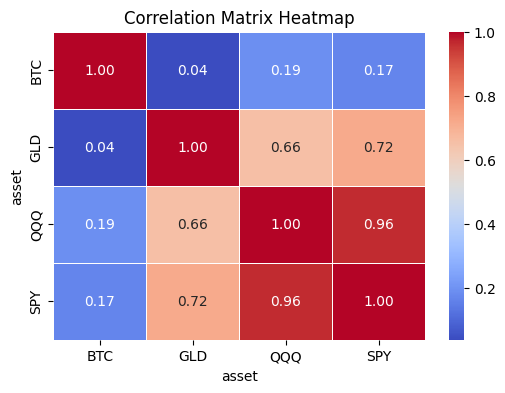

In [79]:
plt.figure(figsize=(6, 4)) # 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [80]:
#Save correlation matrix csv
corr_matrix.to_csv('correlation_matrix.csv')

In [81]:
# List of assets to correlate vs BTC
assets_for_corr = ['SPY', 'QQQ', 'GLD']

#List of columns to keep (BTC + targets)
cols_needed = ['BTC'] + assets_for_corr

#Drop rows with missing values 
pivot_corr = pivot_df[cols_needed].dropna().copy()

#Rolling Window (30 days)
window = 30 

#Loop through each asset (Skip BTC)
for asset in assets_for_corr:
    pivot_corr[f'rolling_corr_BTC_{asset}_{window}'] = (pivot_corr['BTC'].rolling(window).corr(pivot_corr[asset]))



In [82]:
pivot_corr

asset,BTC,SPY,QQQ,GLD,rolling_corr_BTC_SPY_30,rolling_corr_BTC_QQQ_30,rolling_corr_BTC_GLD_30
date,,,,,,,
2017-01-03,0.014823,-0.622044,-0.629330,-0.998955,NaN,NaN,NaN
2017-01-04,0.022419,0.005949,0.005438,0.003530,NaN,NaN,NaN
2017-01-05,0.076968,-0.000794,0.005658,0.015515,NaN,NaN,NaN
2017-01-06,-0.098823,0.003578,0.008770,-0.007373,NaN,NaN,NaN
2017-01-09,0.003917,-0.003301,0.003281,0.008233,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-05-23,-0.039358,-0.006826,-0.009261,0.021906,0.132860,0.127115,-0.076201
2025-05-27,-0.004431,0.020791,0.023525,-0.016949,0.033916,0.043756,-0.120911
2025-05-28,-0.010620,-0.005785,-0.004432,-0.002266,0.052620,0.060258,-0.112648


In [83]:
pivot_corr_long = pivot_corr[['rolling_corr_BTC_SPY_30', 'rolling_corr_BTC_QQQ_30', 'rolling_corr_BTC_GLD_30']].reset_index()
pivot_corr_long = pivot_corr_long.melt(id_vars='date', var_name='pair', value_name='rolling_correlation')

In [84]:
pivot_corr_long

,date,pair,rolling_correlation
0,2017-01-03,rolling_corr_BTC_SPY_30,NaN
1,2017-01-04,rolling_corr_BTC_SPY_30,NaN
2,2017-01-05,rolling_corr_BTC_SPY_30,NaN
3,2017-01-06,rolling_corr_BTC_SPY_30,NaN
4,2017-01-09,rolling_corr_BTC_SPY_30,NaN
...,...,...,...
6337,2025-05-23,rolling_corr_BTC_GLD_30,-0.076201
6338,2025-05-27,rolling_corr_BTC_GLD_30,-0.120911
6339,2025-05-28,rolling_corr_BTC_GLD_30,-0.112648
6340,2025-05-29,rolling_corr_BTC_GLD_30,-0.116073


In [85]:
pivot_corr_long.to_csv('rolling_correlation_long.csv')

In [86]:
pivot_corr.to_csv('rolling_correlation.csv')

In [87]:
#Read lunar eclipse CSV
lunar_eclipse = pd.read_csv('lunar.csv')
lunar_eclipse

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Quincena Solar Eclipse,Gamma,Penumbral Magnitude,Umbral Magnitude,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
0,1,-1999 June 26,14:13:28,46437,-49456,17,N,t-,-1.0981,0.8791,-0.1922,24S,22W,268.8,-,-
1,2,-1999 November 21,20:23:49,46427,-49451,-16,N,-a,-1.1155,0.8143,-0.1921,15N,98W,233.4,-,-
2,3,-1998 May 17,05:47:36,46416,-49445,-11,P,-t,0.8988,1.2105,0.2069,13S,89E,281.7,102.7,-
3,4,-1998 November 11,05:15:58,46404,-49439,-6,P,-a,-0.4644,2.0382,0.9740,12N,113E,343.4,200.8,-
4,5,-1997 May 6,18:57:01,46392,-49433,-1,T+,pp,0.1003,2.6513,1.6963,11S,92W,322.8,213.5,98.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,12060,2999 May 21,13:21:13,4417,12360,166,P,t-,0.4971,1.9853,0.9069,20S,178E,356.7,204.2,-
12060,12061,2999 November 14,16:41:25,4421,12366,171,T,a-,-0.4669,1.9868,1.0153,18N,124E,308.0,189.1,18.5
12061,12062,3000 May 10,15:00:16,4424,12372,176,N,t-,1.2117,0.6604,-0.3907,17S,153E,230.6,-,-
12062,12063,3000 October 5,17:10:38,4427,12377,143,Ne,-h,1.5497,0.0329,-1.0039,6N,118E,53.5,-,-


In [88]:
print(lunar_eclipse['Eclipse Type'].value_counts())

Eclipse Type
P     4207
N     4020
T     1405
T+    1042
T-    1032
Nx     141
Ne     115
Nb     102
Name: count, dtype: int64


In [89]:
lunar_eclipse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Catalog Number                  12064 non-null  int64  
 1   Calendar Date                   12064 non-null  object 
 2   Eclipse Time                    12064 non-null  object 
 3   Delta T (s)                     12064 non-null  int64  
 4   Lunation Number                 12064 non-null  int64  
 5   Saros Number                    12064 non-null  int64  
 6   Eclipse Type                    12064 non-null  object 
 7   Quincena Solar Eclipse          12064 non-null  object 
 8   Gamma                           12064 non-null  float64
 9   Penumbral Magnitude             12064 non-null  float64
 10  Umbral Magnitude                12064 non-null  float64
 11  Latitude                        12064 non-null  object 
 12  Longitude                       

In [90]:
#Select necessary columns (date & eclipse type)
lunar_eclipse_clean = lunar_eclipse[['Calendar Date', 'Eclipse Type']].copy()
lunar_eclipse_clean['year'] = lunar_eclipse_clean['Calendar Date'].str.extract(r'^(-?\d{1,4})').astype(int)
lunar_eclipse_clean = lunar_eclipse_clean[(lunar_eclipse_clean['year'] >= 2017) & (lunar_eclipse_clean['year'] <= 2025)]
lunar_eclipse_clean['Calendar Date'] = pd.to_datetime(lunar_eclipse_clean['Calendar Date'], format='%Y %B %d')

In [91]:
lunar_eclipse_clean.reset_index(drop=True, inplace=True)

In [92]:
lunar_eclipse_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Calendar Date  20 non-null     datetime64[ns]
 1   Eclipse Type   20 non-null     object        
 2   year           20 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 612.0+ bytes


In [93]:
lunar_eclipse_clean

,Calendar Date,Eclipse Type,year
0,2017-02-11,N,2017
1,2017-08-07,P,2017
2,2018-01-31,T,2018
3,2018-07-27,T+,2018
4,2019-01-21,T,2019
5,2019-07-16,P,2019
6,2020-01-10,N,2020
7,2020-06-05,N,2020
8,2020-07-05,N,2020
9,2020-11-30,N,2020


In [94]:
lunar_eclipse_clean = lunar_eclipse_clean.rename(columns={'Calendar Date': 'date', 'Eclipse Type': 'eclipse_type'})
lunar_eclipse_clean

,date,eclipse_type,year
0,2017-02-11,N,2017
1,2017-08-07,P,2017
2,2018-01-31,T,2018
3,2018-07-27,T+,2018
4,2019-01-21,T,2019
5,2019-07-16,P,2019
6,2020-01-10,N,2020
7,2020-06-05,N,2020
8,2020-07-05,N,2020
9,2020-11-30,N,2020


In [95]:
lunar_eclipse_clean = lunar_eclipse_clean.drop('year', axis=1)

In [96]:
print(lunar_eclipse_clean['eclipse_type'].value_counts())

eclipse_type
N     7
P     5
T     5
T+    2
T-    1
Name: count, dtype: int64


In [97]:
category_map_lunar = {
    'T': 'total',
    'T+': 'total',
    'T-': 'total',
    'P': 'penumbral',
    'N': 'penumbral'
}

lunar_eclipse_clean['eclipse_category'] = lunar_eclipse_clean['eclipse_type'].map(category_map_lunar)
lunar_eclipse_clean

,date,eclipse_type,eclipse_category
0,2017-02-11,N,penumbral
1,2017-08-07,P,penumbral
2,2018-01-31,T,total
3,2018-07-27,T+,total
4,2019-01-21,T,total
5,2019-07-16,P,penumbral
6,2020-01-10,N,penumbral
7,2020-06-05,N,penumbral
8,2020-07-05,N,penumbral
9,2020-11-30,N,penumbral


In [98]:
lunar_eclipse_clean['eclipse_name'] = 'lunar'
lunar_eclipse_clean

,date,eclipse_type,eclipse_category,eclipse_name
0,2017-02-11,N,penumbral,lunar
1,2017-08-07,P,penumbral,lunar
2,2018-01-31,T,total,lunar
3,2018-07-27,T+,total,lunar
4,2019-01-21,T,total,lunar
5,2019-07-16,P,penumbral,lunar
6,2020-01-10,N,penumbral,lunar
7,2020-06-05,N,penumbral,lunar
8,2020-07-05,N,penumbral,lunar
9,2020-11-30,N,penumbral,lunar


In [99]:
solar_eclipse = pd.read_csv('solar.csv')
solar_eclipse

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11893,11894,2998 December 10,03:18:31,4414,12355,187,P,1.2838,0.4773,67.2N,145.0E,0,179,NaN,NaN
11894,11895,2999 May 6,23:23:57,4417,12360,154,T,0.8388,1.0566,71.5N,177.3E,33,146,345,03m25s
11895,11896,2999 October 30,09:34:33,4420,12366,159,A-,-1.0023,0.9586,70.9S,84.7W,0,137,-,-
11896,11897,3000 April 26,14:18:06,4424,12372,164,T,0.1310,1.0222,21.1N,18.4W,82,166,76,02m11s


In [100]:
solar_eclipse_clean= solar_eclipse[['Calendar Date', 'Eclipse Type']].copy() #Select necessary columns (date & eclipse type)
solar_eclipse_clean['year'] = solar_eclipse_clean['Calendar Date'].str.extract(r'^(-?\d{1,4})').astype(int) #Regular expression to select dates in years not starting with (-)
solar_eclipse_clean = solar_eclipse_clean[(solar_eclipse_clean['year'] >= 2017) & (solar_eclipse_clean['year'] <= 2025)] # Select range of dates (2017 - 2025)
solar_eclipse_clean['Calendar Date'] = pd.to_datetime(solar_eclipse_clean['Calendar Date'], format='%Y %B %d') #Convert date column to datetime object
solar_eclipse_clean.reset_index(drop=True, inplace=True) #reset index

In [74]:
solar_eclipse_clean

,Calendar Date,Eclipse Type,year
0,2017-02-26,A,2017
1,2017-08-21,T,2017
2,2018-02-15,P,2018
3,2018-07-13,P,2018
4,2018-08-11,P,2018
5,2019-01-06,P,2019
6,2019-07-02,T,2019
7,2019-12-26,A,2019
8,2020-06-21,Am,2020
9,2020-12-14,T,2020


In [101]:
solar_eclipse_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Calendar Date  20 non-null     datetime64[ns]
 1   Eclipse Type   20 non-null     object        
 2   year           20 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 612.0+ bytes


In [102]:
solar_eclipse_clean = solar_eclipse_clean.rename(columns={'Calendar Date': 'date', 'Eclipse Type': 'eclipse_type'})
solar_eclipse_clean

,date,eclipse_type,year
0,2017-02-26,A,2017
1,2017-08-21,T,2017
2,2018-02-15,P,2018
3,2018-07-13,P,2018
4,2018-08-11,P,2018
5,2019-01-06,P,2019
6,2019-07-02,T,2019
7,2019-12-26,A,2019
8,2020-06-21,Am,2020
9,2020-12-14,T,2020


In [103]:
solar_eclipse_clean = solar_eclipse_clean.drop('year', axis=1)

In [104]:
print(solar_eclipse_clean['eclipse_type'].value_counts())

eclipse_type
P     8
A     5
T     5
Am    1
H     1
Name: count, dtype: int64


In [105]:
category_map_solar = {
    'T': 'total',
    'A': 'annular/hybrid',
    'Am': 'annular/hybrid',
    'H': 'annular/hybrid',
    'P': 'partial'
}

solar_eclipse_clean['eclipse_category'] = solar_eclipse_clean['eclipse_type'].map(category_map_solar)

In [106]:
solar_eclipse_clean['eclipse_name'] = 'solar'

In [107]:
solar_eclipse_clean

,date,eclipse_type,eclipse_category,eclipse_name
0,2017-02-26,A,annular/hybrid,solar
1,2017-08-21,T,total,solar
2,2018-02-15,P,partial,solar
3,2018-07-13,P,partial,solar
4,2018-08-11,P,partial,solar
5,2019-01-06,P,partial,solar
6,2019-07-02,T,total,solar
7,2019-12-26,A,annular/hybrid,solar
8,2020-06-21,Am,annular/hybrid,solar
9,2020-12-14,T,total,solar


In [108]:
#Combine lunar and solar eclipse dataframe
#Combine individual DF into a single DF.
lunar_solar_eclipse = pd.concat([lunar_eclipse_clean, solar_eclipse_clean], ignore_index=True)
# lunar_solar_eclipse = lunar_solar_eclipse.reset_index()
lunar_solar_eclipse.info()
lunar_solar_eclipse

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              40 non-null     datetime64[ns]
 1   eclipse_type      40 non-null     object        
 2   eclipse_category  40 non-null     object        
 3   eclipse_name      40 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.4+ KB


,date,eclipse_type,eclipse_category,eclipse_name
0,2017-02-11,N,penumbral,lunar
1,2017-08-07,P,penumbral,lunar
2,2018-01-31,T,total,lunar
3,2018-07-27,T+,total,lunar
4,2019-01-21,T,total,lunar
5,2019-07-16,P,penumbral,lunar
6,2020-01-10,N,penumbral,lunar
7,2020-06-05,N,penumbral,lunar
8,2020-07-05,N,penumbral,lunar
9,2020-11-30,N,penumbral,lunar


In [109]:
all_assets_df_clean = all_assets_df.merge(lunar_solar_eclipse, on='date', how='left')
all_assets_df_clean

,date,asset,asset_class,open,high,low,close,volume,moon_phase,retrograde,daily_return,cumulative_returns,rolling_volatility,rolling_sharpe_30,rolling_sharpe_90,rolling_sharpe_126,rolling_sharpe_252,eclipse_type,eclipse_category,eclipse_name
0,2017-01-01,BTC,Crypto,964.984688,1008.444160,944.110000,966.300000,5.198944e+06,Waxing Crescent Moon,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,BTC,Crypto,999.873057,1034.355016,960.530000,997.750000,8.662642e+06,Waxing Crescent Moon,True,0.032547,1.032547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,BTC,Crypto,1019.000001,1042.005416,990.010000,1012.540000,9.626371e+06,Waxing Crescent Moon,True,0.014823,1.047853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-04,BTC,Crypto,1037.097956,1147.982587,999.990000,1035.240000,1.334620e+07,First Quarter Moon,True,0.022419,1.071344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-05,BTC,Crypto,1133.942221,1159.095335,881.982128,1114.920000,3.474692e+07,First Quarter Moon,True,0.076968,1.153803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9411,2025-05-23,SPY,ETF,574.278157,580.091031,573.899280,577.398909,7.602905e+07,Waning Crescent Moon,False,-0.006826,1.113523,0.012565,4.267621,0.119153,0.023711,0.586058,NaN,NaN,NaN
9412,2025-05-27,SPY,ETF,584.338345,589.562862,576.720918,589.403335,7.258848e+07,New Moon,False,0.020791,1.136674,0.012693,4.347506,0.143998,0.183305,0.699211,NaN,NaN,NaN
9413,2025-05-28,SPY,ETF,589.812123,591.017352,585.250641,585.993440,6.844551e+07,New Moon,False,-0.005785,1.130098,0.012746,3.686531,0.106746,0.096171,0.706838,NaN,NaN,NaN
9414,2025-05-29,SPY,ETF,591.307691,591.447278,584.338345,588.306585,7.007376e+07,Waxing Crescent Moon,False,0.003947,1.134559,0.012700,3.980959,0.048167,0.102785,0.693967,NaN,NaN,NaN


In [110]:
all_assets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9416 entries, 0 to 9415
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                9416 non-null   datetime64[ns]
 1   asset               9416 non-null   object        
 2   asset_class         9416 non-null   object        
 3   open                9416 non-null   float64       
 4   high                9416 non-null   float64       
 5   low                 9416 non-null   float64       
 6   close               9416 non-null   float64       
 7   volume              9416 non-null   float64       
 8   moon_phase          9415 non-null   object        
 9   retrograde          9415 non-null   object        
 10  daily_return        9415 non-null   float64       
 11  cumulative_returns  9415 non-null   float64       
 12  rolling_volatility  9299 non-null   float64       
 13  rolling_sharpe_30   9299 non-null   float64     

In [111]:
#Calculate the Max Drawdown by asset

all_assets_df_clean['cum_max'] = all_assets_df_clean.groupby('asset')['cumulative_returns'].cummax() #Calculate cumulative max

all_assets_df_clean['drawdown'] = (all_assets_df_clean['cumulative_returns'] / all_assets_df_clean['cum_max']) - 1

In [112]:
all_assets_df_clean

,date,asset,asset_class,open,high,low,close,volume,moon_phase,retrograde,...,rolling_volatility,rolling_sharpe_30,rolling_sharpe_90,rolling_sharpe_126,rolling_sharpe_252,eclipse_type,eclipse_category,eclipse_name,cum_max,drawdown
0,2017-01-01,BTC,Crypto,964.984688,1008.444160,944.110000,966.300000,5.198944e+06,Waxing Crescent Moon,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,BTC,Crypto,999.873057,1034.355016,960.530000,997.750000,8.662642e+06,Waxing Crescent Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.032547,0.000000
2,2017-01-03,BTC,Crypto,1019.000001,1042.005416,990.010000,1012.540000,9.626371e+06,Waxing Crescent Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.047853,0.000000
3,2017-01-04,BTC,Crypto,1037.097956,1147.982587,999.990000,1035.240000,1.334620e+07,First Quarter Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.071344,0.000000
4,2017-01-05,BTC,Crypto,1133.942221,1159.095335,881.982128,1114.920000,3.474692e+07,First Quarter Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.153803,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9411,2025-05-23,SPY,ETF,574.278157,580.091031,573.899280,577.398909,7.602905e+07,Waning Crescent Moon,False,...,0.012565,4.267621,0.119153,0.023711,0.586058,NaN,NaN,NaN,1.175020,-0.052337
9412,2025-05-27,SPY,ETF,584.338345,589.562862,576.720918,589.403335,7.258848e+07,New Moon,False,...,0.012693,4.347506,0.143998,0.183305,0.699211,NaN,NaN,NaN,1.175020,-0.032635
9413,2025-05-28,SPY,ETF,589.812123,591.017352,585.250641,585.993440,6.844551e+07,New Moon,False,...,0.012746,3.686531,0.106746,0.096171,0.706838,NaN,NaN,NaN,1.175020,-0.038231
9414,2025-05-29,SPY,ETF,591.307691,591.447278,584.338345,588.306585,7.007376e+07,Waxing Crescent Moon,False,...,0.012700,3.980959,0.048167,0.102785,0.693967,NaN,NaN,NaN,1.175020,-0.034435


In [113]:
all_assets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9416 entries, 0 to 9415
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                9416 non-null   datetime64[ns]
 1   asset               9416 non-null   object        
 2   asset_class         9416 non-null   object        
 3   open                9416 non-null   float64       
 4   high                9416 non-null   float64       
 5   low                 9416 non-null   float64       
 6   close               9416 non-null   float64       
 7   volume              9416 non-null   float64       
 8   moon_phase          9415 non-null   object        
 9   retrograde          9415 non-null   object        
 10  daily_return        9415 non-null   float64       
 11  cumulative_returns  9415 non-null   float64       
 12  rolling_volatility  9299 non-null   float64       
 13  rolling_sharpe_30   9299 non-null   float64     

In [ ]:
#Calculate the rolling 90-day volatility

all_assets_df_clean['rolling_volatility_90'] = all_assets_df_clean.groupby('asset')['daily_return'].rolling(window=90).std().reset_index(0, drop=True)
all_assets_df_clean

,date,asset,asset_class,open,high,low,close,volume,moon_phase,retrograde,...,rolling_sharpe_30,rolling_sharpe_90,rolling_sharpe_126,rolling_sharpe_252,eclipse_type,eclipse_category,eclipse_name,cum_max,drawdown,rolling_volatility_90
0,2017-01-01,BTC,Crypto,964.984688,1008.444160,944.110000,966.300000,5.198944e+06,Waxing Crescent Moon,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,BTC,Crypto,999.873057,1034.355016,960.530000,997.750000,8.662642e+06,Waxing Crescent Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.032547,0.000000,NaN
2,2017-01-03,BTC,Crypto,1019.000001,1042.005416,990.010000,1012.540000,9.626371e+06,Waxing Crescent Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.047853,0.000000,NaN
3,2017-01-04,BTC,Crypto,1037.097956,1147.982587,999.990000,1035.240000,1.334620e+07,First Quarter Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.071344,0.000000,NaN
4,2017-01-05,BTC,Crypto,1133.942221,1159.095335,881.982128,1114.920000,3.474692e+07,First Quarter Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.153803,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9411,2025-05-23,SPY,ETF,574.278157,580.091031,573.899280,577.398909,7.602905e+07,Waning Crescent Moon,False,...,4.267621,0.119153,0.023711,0.586058,NaN,NaN,NaN,1.175020,-0.052337,0.018283
9412,2025-05-27,SPY,ETF,584.338345,589.562862,576.720918,589.403335,7.258848e+07,New Moon,False,...,4.347506,0.143998,0.183305,0.699211,NaN,NaN,NaN,1.175020,-0.032635,0.018314
9413,2025-05-28,SPY,ETF,589.812123,591.017352,585.250641,585.993440,6.844551e+07,New Moon,False,...,3.686531,0.106746,0.096171,0.706838,NaN,NaN,NaN,1.175020,-0.038231,0.018324
9414,2025-05-29,SPY,ETF,591.307691,591.447278,584.338345,588.306585,7.007376e+07,Waxing Crescent Moon,False,...,3.980959,0.048167,0.102785,0.693967,NaN,NaN,NaN,1.175020,-0.034435,0.018298


In [115]:
btc_returns = all_assets_df_clean[all_assets_df_clean['asset'] == 'BTC'][['date', 'daily_return']]
btc_returns = btc_returns.rename(columns={'daily_return': 'btc_daily_return'})

all_assets_df_clean = all_assets_df_clean.merge(btc_returns, on='date', how='left')
all_assets_df_clean

,date,asset,asset_class,open,high,low,close,volume,moon_phase,retrograde,...,rolling_sharpe_90,rolling_sharpe_126,rolling_sharpe_252,eclipse_type,eclipse_category,eclipse_name,cum_max,drawdown,rolling_volatility_90,btc_daily_return
0,2017-01-01,BTC,Crypto,964.984688,1008.444160,944.110000,966.300000,5.198944e+06,Waxing Crescent Moon,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,BTC,Crypto,999.873057,1034.355016,960.530000,997.750000,8.662642e+06,Waxing Crescent Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,1.032547,0.000000,NaN,0.032547
2,2017-01-03,BTC,Crypto,1019.000001,1042.005416,990.010000,1012.540000,9.626371e+06,Waxing Crescent Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,1.047853,0.000000,NaN,0.014823
3,2017-01-04,BTC,Crypto,1037.097956,1147.982587,999.990000,1035.240000,1.334620e+07,First Quarter Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,1.071344,0.000000,NaN,0.022419
4,2017-01-05,BTC,Crypto,1133.942221,1159.095335,881.982128,1114.920000,3.474692e+07,First Quarter Moon,True,...,NaN,NaN,NaN,NaN,NaN,NaN,1.153803,0.000000,NaN,0.076968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9411,2025-05-23,SPY,ETF,574.278157,580.091031,573.899280,577.398909,7.602905e+07,Waning Crescent Moon,False,...,0.119153,0.023711,0.586058,NaN,NaN,NaN,1.175020,-0.052337,0.018283,-0.039358
9412,2025-05-27,SPY,ETF,584.338345,589.562862,576.720918,589.403335,7.258848e+07,New Moon,False,...,0.143998,0.183305,0.699211,NaN,NaN,NaN,1.175020,-0.032635,0.018314,-0.004431
9413,2025-05-28,SPY,ETF,589.812123,591.017352,585.250641,585.993440,6.844551e+07,New Moon,False,...,0.106746,0.096171,0.706838,NaN,NaN,NaN,1.175020,-0.038231,0.018324,-0.010620
9414,2025-05-29,SPY,ETF,591.307691,591.447278,584.338345,588.306585,7.007376e+07,Waxing Crescent Moon,False,...,0.048167,0.102785,0.693967,NaN,NaN,NaN,1.175020,-0.034435,0.018298,-0.020757


In [ ]:
# Recalculate the cumulative returns from scratch
all_assets_df_clean['cumulative_returns'] = all_assets_df_clean.groupby('asset')['daily_return'].transform(lambda x: (1 + x).cumprod())
all_assets_df_clean['normalized_cumulative_return'] = all_assets_df_clean['cumulative_returns'] / all_assets_df_clean.groupby('asset')['cumulative_returns'].transform('first')

In [128]:

all_assets_df_clean

,date,asset,asset_class,open,high,low,close,volume,moon_phase,retrograde,...,rolling_sharpe_126,rolling_sharpe_252,eclipse_type,eclipse_category,eclipse_name,cum_max,drawdown,rolling_volatility_90,btc_daily_return,normalized_cumulative_return
0,2017-01-01,BTC,Crypto,964.984688,1008.444160,944.110000,966.300000,5.198944e+06,Waxing Crescent Moon,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,BTC,Crypto,999.873057,1034.355016,960.530000,997.750000,8.662642e+06,Waxing Crescent Moon,True,...,NaN,NaN,NaN,NaN,NaN,1.032547,0.000000,NaN,0.032547,1.000000
2,2017-01-03,BTC,Crypto,1019.000001,1042.005416,990.010000,1012.540000,9.626371e+06,Waxing Crescent Moon,True,...,NaN,NaN,NaN,NaN,NaN,1.047853,0.000000,NaN,0.014823,1.014823
3,2017-01-04,BTC,Crypto,1037.097956,1147.982587,999.990000,1035.240000,1.334620e+07,First Quarter Moon,True,...,NaN,NaN,NaN,NaN,NaN,1.071344,0.000000,NaN,0.022419,1.037575
4,2017-01-05,BTC,Crypto,1133.942221,1159.095335,881.982128,1114.920000,3.474692e+07,First Quarter Moon,True,...,NaN,NaN,NaN,NaN,NaN,1.153803,0.000000,NaN,0.076968,1.117434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9411,2025-05-23,SPY,ETF,574.278157,580.091031,573.899280,577.398909,7.602905e+07,Waning Crescent Moon,False,...,0.023711,0.586058,NaN,NaN,NaN,1.175020,-0.052337,0.018283,-0.039358,2.946174
9412,2025-05-27,SPY,ETF,584.338345,589.562862,576.720918,589.403335,7.258848e+07,New Moon,False,...,0.183305,0.699211,NaN,NaN,NaN,1.175020,-0.032635,0.018314,-0.004431,3.007427
9413,2025-05-28,SPY,ETF,589.812123,591.017352,585.250641,585.993440,6.844551e+07,New Moon,False,...,0.096171,0.706838,NaN,NaN,NaN,1.175020,-0.038231,0.018324,-0.010620,2.990028
9414,2025-05-29,SPY,ETF,591.307691,591.447278,584.338345,588.306585,7.007376e+07,Waxing Crescent Moon,False,...,0.102785,0.693967,NaN,NaN,NaN,1.175020,-0.034435,0.018298,-0.020757,3.001831


In [129]:
all_assets_df_clean.to_csv('all_assets_clean_clean.csv')

In [140]:
# Step 1: One-hot encode moon_phase
moon_dummies = pd.get_dummies(all_assets_df_clean['moon_phase'])

# Step 2: Combine with original dataframe
df_encoded = pd.concat([all_assets_df_clean, moon_dummies], axis=1)

# Step 3: Drop NaN returns (if any)
df_encoded = df_encoded.dropna(subset=['daily_return'])

# Step 4: Group by asset, then compute correlation between moon phases and daily return
correlations = {}

for asset in df_encoded['asset'].unique():
    asset_df = df_encoded[df_encoded['asset'] == asset]
    corr = asset_df[moon_dummies.columns.tolist() + ['daily_return']].corr()
    correlations[asset] = corr['daily_return'].drop('daily_return')

# Show correlations for BTC as an example
correlations['BTC']


First Quarter Moon     -0.006705
Full Moon               0.000607
Last Quarter Moon      -0.020504
New Moon               -0.004369
Waning Crescent Moon    0.019278
Waning Gibbous Moon    -0.007917
Waxing Crescent Moon    0.008754
Waxing Gibbous Moon     0.002077
Name: daily_return, dtype: float64